# Problem 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

%matplotlib inline

In [2]:
def iterate_sc_equation(J, beta, s0=None, max_iter=None, tol=1e-7, verbose=True, approximation='MF'):
    """Iterate MF or TAP self-consistency equation"""
    
    # Some pre-processing
    size_x = J.shape[0]
    max_iter = max_iter or 100 * size_x
    
    # Initialize variables
    B = np.zeros(size_x)
    m = np.random.rand(size_x)
    m_old = np.zeros(size_x)
    
    for t in range(max_iter):
        # Perform iteration
        if approximation == 'TAP':
            B = beta * J.dot(m) - beta ** 2 * m_old * (J ** 2).dot(1 - m ** 2) 
        elif approximation == 'MF':
            B = beta * J.dot(m) 
        m_old = np.copy(m)
        m = np.tanh(B)
         
        # Compute metrics
        diff = np.mean(np.abs(m - m_old))
        
        # Print iteration status on screen
        if verbose:
            print("t = %d, diff = %g" % (t, diff))
        
        # Check for convergence
        if diff < tol:
            break
            
    return m

In [3]:
fs=30  # label fontsize
fsl=20 # legend fontsize

## Point a)  
* Write a code to perform the MCMC dynamics, and start by configurations extracted uniformly at random.  
    * i) Sample a particular realization of $\mathbf{J}\sim \mathcal{N}(0,\sigma^{2} / \sqrt{N})$, for $\sigma^{2}=1$ and $ \beta = 1.1$. 
    * ii) Run your dynamics for a long enough time (say, with $ t_{\mathrm{max}} = 10^{3} N $ attempts to flips spins) and monitor the value of the magnetization $ m = \sum_i s_i/N $ as a function of time.   

Make a plot for $ N=10,100,1000 $ spins. 


In [4]:
def sample_instance(N, var_noise):
    """Sample {J} from P(J)= Normal(0, var_noise)"""
    
    noise = np.sqrt(var_noise) * np.random.randn(N, N) / np.sqrt(N) 
    noise = np.tril(noise) + np.tril(noise).T  # make noise symmetric
    J = noise
    np.fill_diagonal(J, 0)  # set diagonal elements to zero

    return J

Example call

In [5]:
J = sample_instance(100, 0.1)
iterate_sc_equation(J, 1., verbose=True, max_iter=20, approximation='TAP')

t = 0, diff = 0.594609
t = 1, diff = 0.16145
t = 2, diff = 0.0474637
t = 3, diff = 0.0148935
t = 4, diff = 0.00449317
t = 5, diff = 0.00127778
t = 6, diff = 0.000467023
t = 7, diff = 0.000165616
t = 8, diff = 5.09826e-05
t = 9, diff = 1.63879e-05
t = 10, diff = 4.33896e-06
t = 11, diff = 1.36524e-06
t = 12, diff = 4.84167e-07
t = 13, diff = 1.57739e-07
t = 14, diff = 4.96944e-08


array([ 6.40496060e-09, -7.82700158e-09,  1.40420188e-08, -1.93288846e-09,
        6.90089865e-09,  2.69054883e-08, -4.38570143e-09, -3.71752602e-09,
        1.73519167e-08, -1.06674362e-08, -1.27067134e-09,  1.20162380e-08,
        9.17511571e-09,  1.78809755e-08, -1.66097205e-08,  1.28822328e-08,
        1.22907860e-08, -2.81740587e-08,  2.97044072e-08, -9.85142393e-09,
       -1.53978591e-08,  2.20136933e-09,  1.67897825e-08, -3.89792636e-08,
       -1.26655151e-08, -2.92874479e-08, -1.19957342e-08,  2.67479555e-09,
        5.59883598e-09, -1.23864596e-08, -1.30611505e-08, -8.36996409e-12,
       -7.54521280e-09, -1.10168733e-08, -1.13028104e-09, -1.40892266e-08,
        1.67456284e-08, -3.28192662e-08,  7.77610062e-09, -1.20429896e-09,
       -1.43084875e-08,  7.22283602e-09,  2.31809240e-08,  1.31673422e-08,
       -4.32820577e-08,  1.77086495e-08, -4.94119079e-09, -1.89019798e-08,
       -5.72514671e-09,  4.18326848e-08, -1.18742361e-08,  1.24534711e-08,
        2.99419395e-08,  

In [6]:
def SK_simul(N, beta, J, t_max=None, t_eq=None):
    t_max = t_max or 1000 * N     # max number of iterations 
    t_eq = t_eq or 10 * N         # number of MCMC iterations before convergence
    S = np.random.choice([+1, -1], N)       
    delta_E = lambda S, k: -2 * S[k] * np.dot(J[k, :], S) 
    
    m = np.full(t_max - t_eq, np.nan)     # average magnetization for every new sample
    m_complete = np.zeros(N)              # to compute magnetization for every index
    count = 0
    for t in range(t_max):
        k, r = np.random.randint(0, N), np.random.uniform(0, 1)
        if r < np.exp(beta * delta_E(S, k)):
            S[k] = -S[k]
            if t >= t_eq:
                m[t - t_eq] = S.mean()
                m_complete = m_complete + S
                count += 1
    return m, m_complete / float(count)

In [7]:
beta = 1.1
N_list = [10, 100, 1000]
var_noise = 1


Running MCMC for N =  10
Finding m* for MF and TAP approximations for N = 10

Running MCMC for N =  100
Finding m* for MF and TAP approximations for N = 100

Running MCMC for N =  1000
Finding m* for MF and TAP approximations for N = 1000


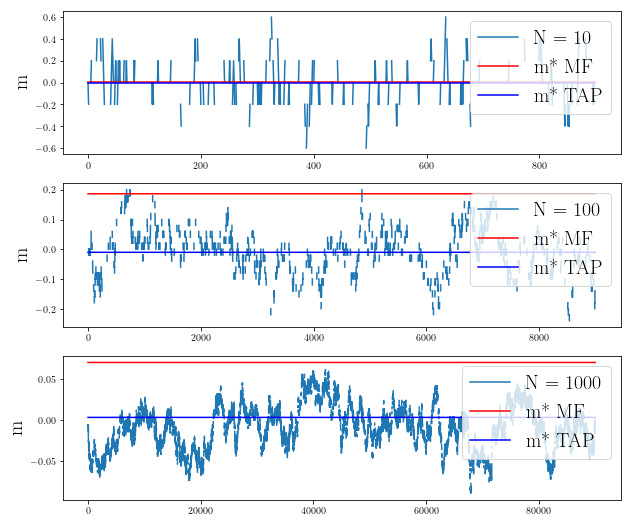

In [8]:

fig, ax = plt.subplots(len(N_list), figsize=(10, 3 * len(N_list)))
for i, N in enumerate(N_list):
    J = sample_instance(N, var_noise)
    print('\nRunning MCMC for N = ', N) 
    m, _ = SK_simul(N, beta, J, t_max=100*N)
    print('Finding m* for MF and TAP approximations for N =', N)
    m_mf = iterate_sc_equation(J, beta, approximation='MF', verbose=False)
    m_tap = iterate_sc_equation(J, beta, approximation='TAP', verbose=False)
    ax[i].plot(m, label=r'N = {0}'.format(N))
    ax[i].plot(np.ones_like(m) * m_mf.mean(), label='m* MF', c='r')
    ax[i].plot(np.ones_like(m) * m_tap.mean(), label='m* TAP', c='b')
    ax[i].legend(loc='upper right',fontsize=20)
    ax[i].set_ylabel('m',fontsize=20)
# plt.savefig('./figures/SK_MCMC_sample_ex2a.png', bbox_inches='tight')    

## Point b)  
*  Iterate MF and TAP equations and compare the values obtained from the ground truth MCMC sampler.  To do so, draw a scatter plot of the single values $m_i$ obtained from the MCMC sampler and the approximations (one plot per approximation, for a total of 2 plots).   
Comment.   

Similarly to before, implement the consistency equations as:
        \begin{align*}
		m_i^{(t+1)} &= \tanh \left( \beta \sum_j J_{ij} \, m_j^{(t)}  \right)   & \mbox{Mean Field}   	\\
			m_i^{(t+1)} &= \tanh \left(  
				\beta \sum_j J_{ij} \, m_j^{(t)}  - 
				\beta^2  m_i^{(t-1)}  \sum_j  J_{ij}^{2}\,(1 - (m_j^{(t)})^2)   \right)      
				& \mbox{TAP}   	\\
\end{align*}



Iterating MF fixed point equations for N = 10
Iterating TAP fixed point equations for N = 10
Running Metropolis-Hastings sampler 

Iterating MF fixed point equations for N = 100
Iterating TAP fixed point equations for N = 100
Running Metropolis-Hastings sampler 

Iterating MF fixed point equations for N = 1000
Iterating TAP fixed point equations for N = 1000
Running Metropolis-Hastings sampler 


Text(0.5, 0, '$m_{MCMC}$')

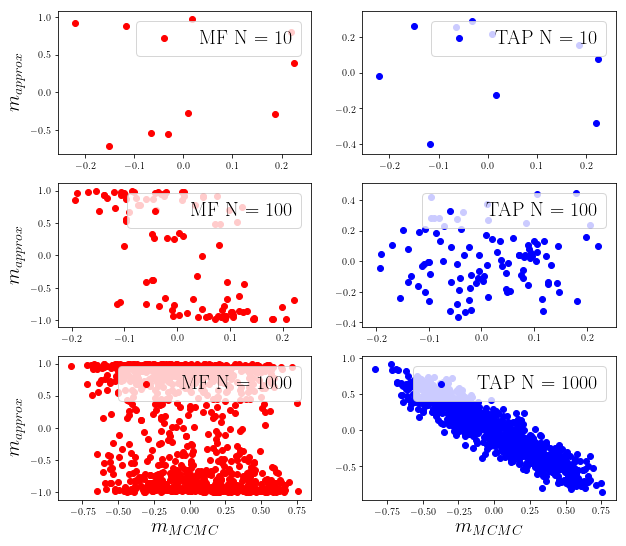

In [9]:
np.random.seed(2313)
var_noise=1.
fig, ax = plt.subplots(len(N_list), 2, figsize=(10, 3 * len(N_list)))
for i, N in enumerate(N_list):
    J = sample_instance(N, var_noise)   
    print(f'\nIterating MF fixed point equations for N = {N}')
    m_mf = iterate_sc_equation(J, beta, tol=1e-4, verbose=False, approximation='MF')
    print(f'Iterating TAP fixed point equations for N = {N}')
    m_tap = iterate_sc_equation(J, beta, tol=1e-4, verbose=False, approximation='TAP')
    print('Running Metropolis-Hastings sampler ')
    _, m_gt = SK_simul(N, beta, J)
    ax[i, 0].scatter(m_gt, m_mf, label=f'MF N = {N}', c='r')
    ax[i, 1].scatter(m_gt, m_tap, label=f'TAP N = {N}', c='b')
    ax[i, 0].legend(loc='upper right',fontsize=20)
    ax[i, 1].legend(loc='upper right',fontsize=20)
    ax[i, 0].set_ylabel(r'$m_{approx}$',fontsize=20)
ax[-1, 0].set_xlabel(r'$m_{MCMC}$',fontsize=20)
ax[-1, 1].set_xlabel(r'$m_{MCMC}$',fontsize=20)
# plt.savefig('./figures/MF_vs_TAP_MSE_sample_ex2b.png', bbox_inches='tight')